In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Competitions/2021/bento'

/content/drive/MyDrive/Competitions/2021/bento


In [2]:
import numpy as np
import pandas as pd
import glob
from tqdm import tqdm
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats
import keras
import pickle

In [3]:
data=pd.DataFrame(columns=['X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2', 'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4',
       'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6', 'X7', 'Y7', 'Z7', 'X8', 'Y8', 'Z8',
       'X9', 'Y9', 'Z9', 'X10', 'Y10', 'Z10', 'X11', 'Y11', 'Z11', 'X12',
       'Y12', 'Z12', 'X13', 'Y13', 'Z13','subject_id','activity'])

In [21]:
for subjects in tqdm(glob.glob("/content/drive/MyDrive/Competitions/2021/bento/data/TrainData/*")):
    for activity in tqdm(glob.glob(subjects+'/*')):
       for file in tqdm(glob.glob(activity+'/*')):
         temp = pd.read_csv(file)
         data = data.append(temp)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 17%|█▋        | 1/6 [00:00<00:04,  1.22it/s]

 33%|███▎      | 2/6 [00:01<00:03,  1.29it/s]

 50%|█████     | 3/6 [00:02<00:02,  1.39it/s]

 67%|██████▋   | 4/6 [00:02<00:01,  1.43it/s]

 83%|████████▎ | 5/6 [00:03<00:00,  1.58it/s]

100%|██████████| 6/6 [00:03<00:00,  1.55it/s]

 10%|█         | 1/10 [00:03<00:34,  3.88s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:00<00:02,  1.72it/s]

 40%|████      | 2/5 [00:01<00:01,  1.74it/s]

 60%|██████    | 3/5 [00:01<00:01,  1.76it/s]

 80%|████████  | 4/5 [00:02<00:00,  1.78it/s]

100%|██████████| 5/5 [00:02<00:00,  1.78it/s]

 20%|██        | 2/10 [00:06<00:28,  3.57s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:00<00:02,  1.81it/s]

 40%|████      | 2/5 [00:01<00:01,  1.83it/s]

 60%|██████    | 3/5 [00:01<00:01,  1.78it/s]

 80%|████████  | 4/5 [00:02<00:00,  1.80it/s]

100%|██████████| 5/5 [00:02<00:00,  1.76it

In [22]:
data

,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11,X12,Y12,Z12,X13,Y13,Z13,subject_id,activity
0,-24.99140,-282.33411,1725.02197,27.98079,-170.33582,1682.07263,-60.35081,-342.56720,1607.94543,131.77347,-267.85861,1479.75525,69.06049,-394.36011,1331.59558,410.11078,-297.70349,1399.53845,637.92731,-275.73657,1356.81531,-203.22826,-260.40796,1460.37683,-470.06992,-254.09720,1375.38879,-684.75317,-193.84540,1359.60962,129.41847,-175.80733,982.15582,-151.51668,-169.05608,964.23053,-14.40462,-360.28680,1034.29651,2,9
1,-25.27479,-281.36115,1725.01160,28.13761,-169.75511,1681.63477,-61.03844,-341.86926,1608.21619,131.30066,-267.95807,1479.66504,68.41459,-394.43344,1331.54285,409.52338,-298.17059,1399.20166,637.29803,-276.58395,1356.14624,-203.83026,-260.21704,1460.17712,-470.44269,-253.41087,1374.70398,-685.06549,-193.19374,1358.65344,129.00479,-175.88455,982.19525,-151.85548,-168.83398,964.21234,-14.92233,-360.21738,1034.21436,2,9
2,-25.53383,-280.45801,1724.99683,28.23895,-169.13199,1681.20483,-61.67131,-341.16248,1608.45166,130.84573,-268.06970,1479.58765,67.72872,-394.49670,1331.50244,408.92444,-298.68652,1398.84363,636.68610,-277.39746,1355.50391,-204.48645,-259.99039,1459.99817,-471.00336,-253.21721,1374.15564,-685.50580,-192.45528,1357.73120,128.63408,-175.97968,982.25806,-152.17355,-168.74077,964.21906,-15.47514,-360.16858,1034.10913,2,9
3,-25.78953,-279.51373,1724.99341,28.32689,-168.53717,1680.73804,-62.34846,-340.49841,1608.68335,130.46959,-268.31342,1479.41675,67.03043,-394.57217,1331.44214,408.33340,-299.26779,1398.47656,636.07843,-278.29095,1354.94202,-205.16315,-259.77988,1459.83105,-471.49619,-252.79373,1373.52710,-685.89838,-191.71297,1356.74817,128.66393,-175.87572,982.38434,-152.51700,-168.49796,964.17407,-16.03033,-360.15262,1033.98865,2,9
4,-26.06820,-278.61380,1724.97754,28.35340,-167.98064,1680.31824,-63.01613,-339.83398,1608.95190,129.84177,-268.41339,1479.37073,66.33998,-394.62036,1331.35938,407.74365,-299.85309,1398.11902,635.51434,-279.12390,1354.40515,-205.79475,-259.53104,1459.64648,-472.01602,-252.36401,1372.91553,-686.35022,-191.00626,1355.87646,127.86398,-176.06995,982.34814,-152.85605,-168.25673,964.14014,-16.63938,-360.05154,1033.91248,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5522,146.10150,12.56202,1693.38733,132.71758,-128.03180,1686.80298,129.35867,-134.33534,1541.76563,294.28870,-84.91979,1421.23352,222.81415,-204.07915,1293.05017,554.32587,-134.38737,1291.43652,774.05139,-122.46677,1251.81274,-36.70862,-86.10657,1431.12280,-270.41220,-140.10251,1271.75757,-497.16116,-118.66913,1238.28333,287.81964,-35.96916,960.74176,-28.23988,-38.56216,976.76489,123.13810,-175.84337,941.99976,3,8
5523,146.12010,12.78585,1693.37036,132.72308,-127.80782,1686.82617,129.31807,-134.15895,1541.79614,294.22745,-84.84080,1421.23193,222.72911,-204.05785,1293.13586,554.22772,-134.37759,1291.42676,773.96204,-122.51003,1251.78223,-36.77703,-85.99462,1431.15210,-270.51465,-139.99832,1271.84192,-497.24646,-118.55183,1238.38342,287.77432,-36.05311,960.75818,-28.29233,-38.62187,976.75214,123.07795,-175.88858,942.01556,3,8
5524,146.11467,13.02148,1693.35278,132.70636,-127.61009,1686.86438,129.27818,-133.99350,1541.83679,294.24426,-84.88007,1421.48389,222.65565,-203.99829,1293.19299,554.13989,-134.38696,1291.42932,773.86835,-122.53246,1251.75427,-36.83770,-85.89353,1431.19275,-270.60608,-139.90764,1271.93530,-497.34518,-118.42133,1238.49707,287.71390,-36.10751,960.77405,-28.34133,-38.68897,976.77356,123.01847,-175.98259,942.04315,3,8
5525,146.17815,13.23070,1693.34033,132.72740,-127.41499,1686.91858,129.22026,-133.85690,1541.91687,294.18207,-84.80701,1421.50220,222.56987,-203.97800,1293.23560,554.06860,-134.40459,1291.43018,773.79596,-122.56427,1251.72571,-36.89711,-85.80135,1431.21985,-270.71832,-139.80940,1272.01831,-497.44745,-118.31225,1238.6

In [24]:
%cd '/content/drive/MyDrive/Competitions/2021/bento/data'
%mkdir ''

/content/drive/MyDrive/Competitions/2021/bento/data


In [28]:
data.to_pickle("/content/drive/MyDrive/Competitions/2021/bento/data/cobined_data.pkl", compression = "xz")

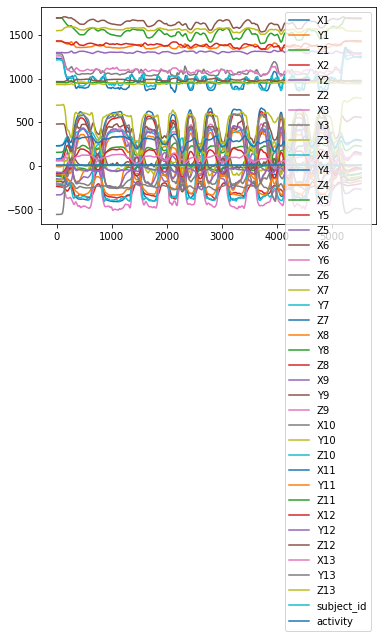

In [29]:
temp.plot()

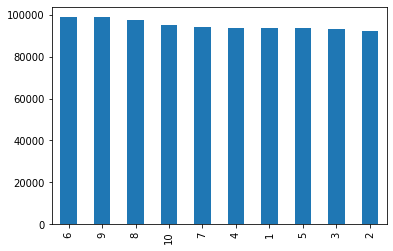

In [30]:
data['activity'].value_counts().plot.bar()

In [31]:
data = data.fillna(0)

In [32]:
data.isnull().sum().sum()

0

In [33]:
def segmentation(x_data,overlap_rate,time_window):
    
    # make a list for segment window and its label
    seg_data = []
    y_segmented_list = []

    #convert overlap rate to step for sliding window
    overlap = int((1 - overlap_rate)*time_window)
    
    #segment and keep the labels
    for i in range(0,x_data.shape[0],overlap):
        seg_data.append(x_data[i:i+time_window])
        y_segmented_list.append(x_data['activity'][i])
        
    return seg_data,y_segmented_list

In [34]:
def get_features(x_data):
    #Set features list
    features = []
    #Set columns name list
    DFclist=list(x_data.columns)

    #Calculate features (STD, Average, Max, Min) for each data columns X Y Z 
    for k in DFclist:
        # std
        features.append(x_data[k].std(ddof=0))
        # avg
        features.append(np.average(x_data[k]))
        # max
        features.append(np.max(x_data[k]))
        # min
        features.append(np.min(x_data[k]))
        #median
        features.append(np.median(x_data[k]))
        #variance
        features.append(np.var(x_data[k]))
        #skewness
        features.append(stats.skew(x_data[k]))
        #kurtosis
        features.append(stats.kurtosis(x_data[k]))


    return features

In [35]:
from sklearn.ensemble import RandomForestClassifier         
model_ml = RandomForestClassifier(n_estimators=500,n_jobs=-1)

In [36]:


#Segmentation with overlaprate=0 & window=100
df1_itpl=data.reset_index(drop = True).interpolate()
#replace missing values with 0
df1_itpl=df1_itpl.fillna(0) 
[seg, seg_label]=segmentation(df1_itpl,0,100)



In [37]:
features_list=[]
label_list=[]
for j in tqdm(range(0,len(seg))):
    #extract only xyz columns
            frame1=seg[j].drop(columns=['subject_id','activity'])
            

            #Get features and label for each elements
            features_list.append(get_features(frame1))
            label_list.append(seg_label[j])

100%|██████████| 9507/9507 [06:51<00:00, 23.10it/s]


In [38]:
X_train, X_test, y_train, y_test = train_test_split(features_list, label_list, test_size=0.3, random_state=42)

In [39]:
model_ml.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

              precision    recall  f1-score   support

           1       0.68      0.65      0.67       285
           2       0.58      0.63      0.60       283
           3       0.44      0.43      0.43       270
           4       0.61      0.51      0.56       277
           5       0.68      0.56      0.61       295
           6       0.66      0.86      0.75       284
           7       0.58      0.66      0.62       271
           8       0.57      0.53      0.55       296
           9       0.63      0.58      0.61       298
          10       0.71      0.72      0.72       294

    accuracy                           0.62      2853
   macro avg       0.61      0.61      0.61      2853
weighted avg       0.62      0.62      0.61      2853



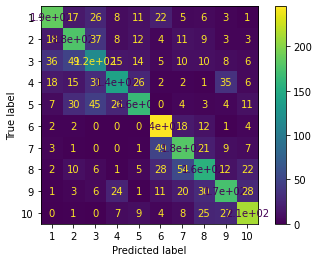

In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

y_predict = model_ml.predict(X_test)
print(classification_report(y_test,y_predict))
#confusion_matrix(y_test, y_predict)
plot_confusion_matrix(model_ml, X_test, y_test)
plt.show()